# 06 시각화

## 선그래프
+ 시간에 따른 데이터의 변화를 시각화할 때 유용하게 사용
    - 지난 10년간 경유 가격의 평균값
    - 지난 2달간 몸무게 변화
+ 시계열 데이터를 시각화하는데 주로 사용
+ plot(x축값, y축값, type='l')
+ lines(x축값, y축값)

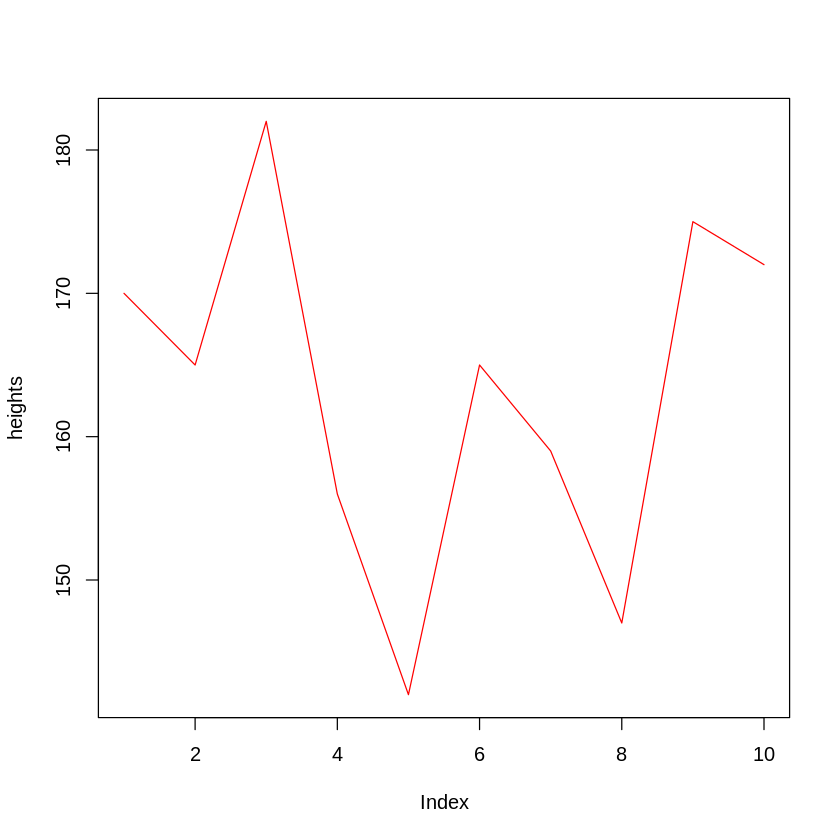

In [1]:
# 학생 10명의 키 데이터 시각화
load('heights.rdata')
plot(heights, type='l', col='red')

In [2]:
# 항공사 승객 데이터
?AirPassengers

AirPassengers {datasets},R Documentation


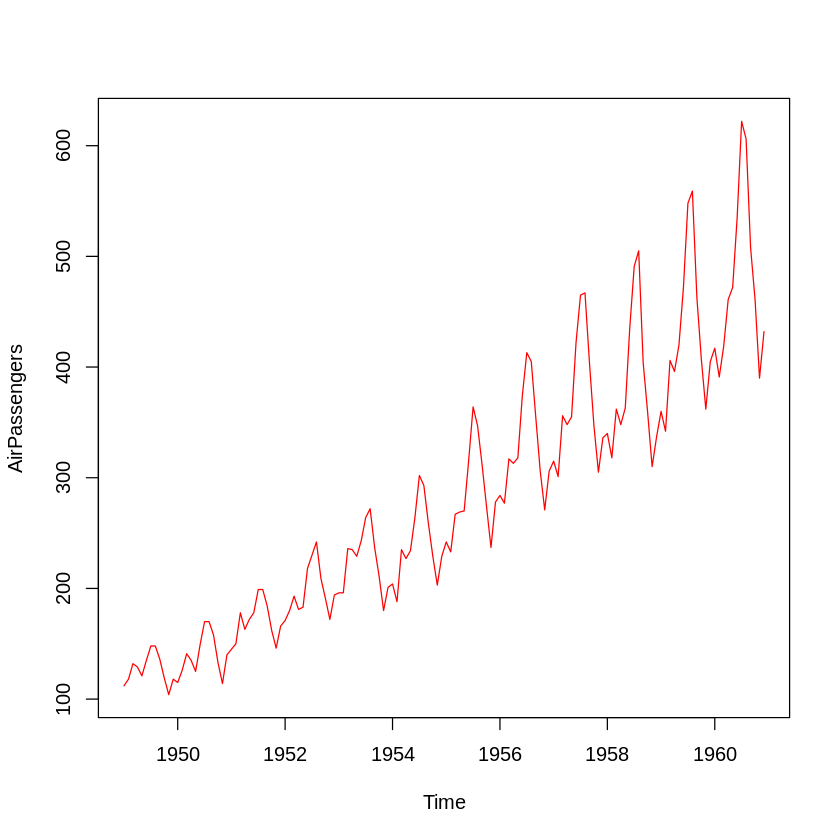

In [3]:
plot(AirPassengers, type='l', col='red')

In [4]:
# 나일강 홍수 데이터
?Nile

Nile {datasets},R Documentation


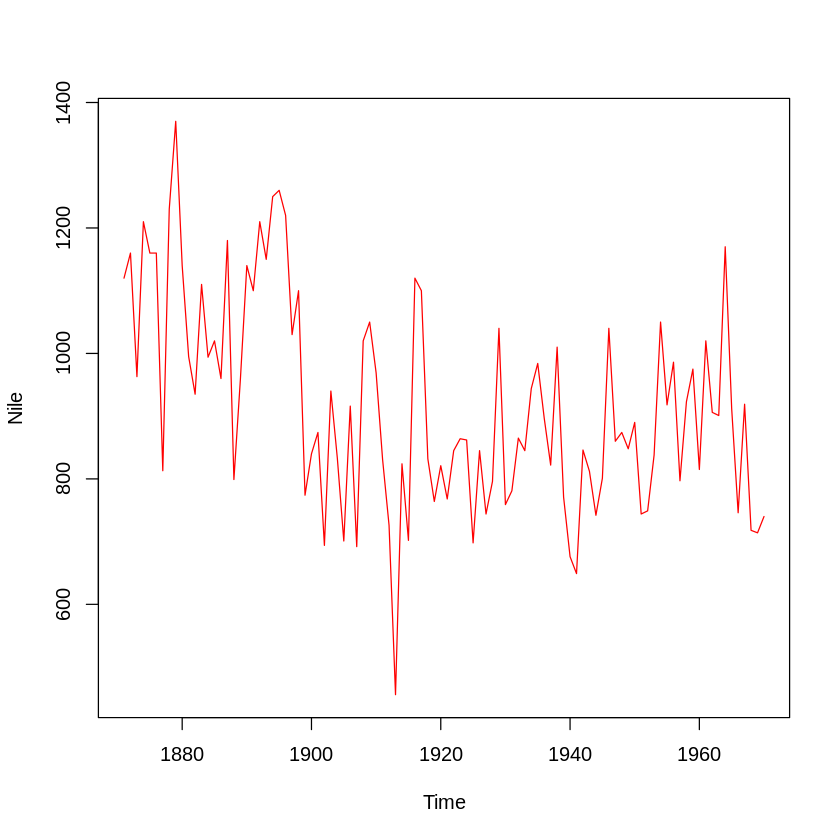

In [5]:
plot(Nile, type='l', col='red')

In [6]:
# 존슨앤존슨 분기별 주식데이터
?JohnsonJohnson

JohnsonJohnson {datasets},R Documentation


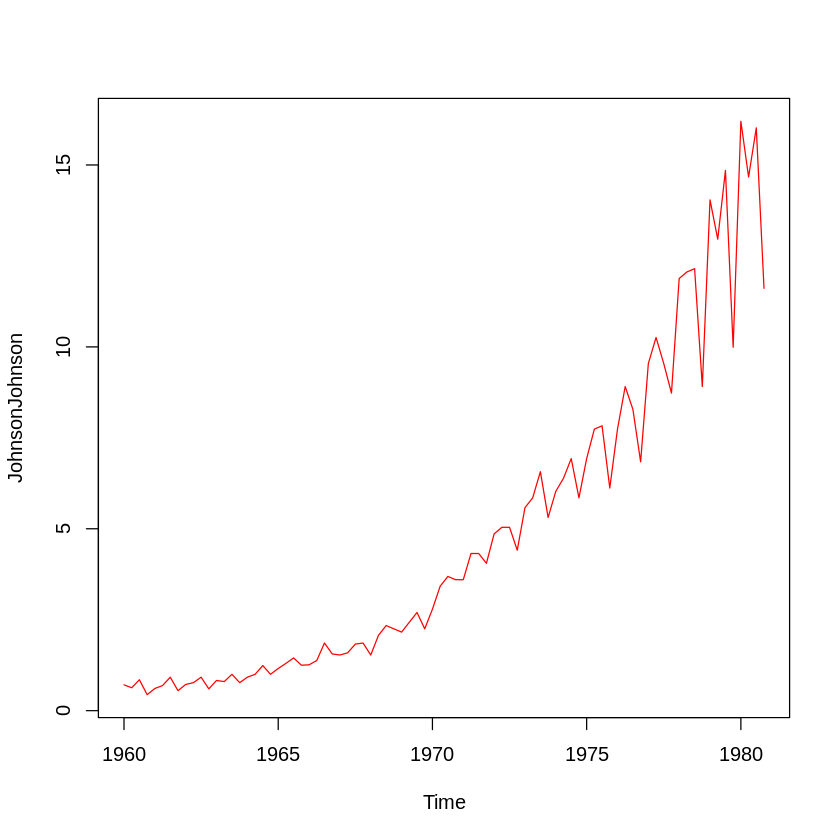

In [7]:
plot(JohnsonJohnson, type='l', col='red')

In [8]:
# 태양 평균 흑점수
?sunspots

sunspots {datasets},R Documentation


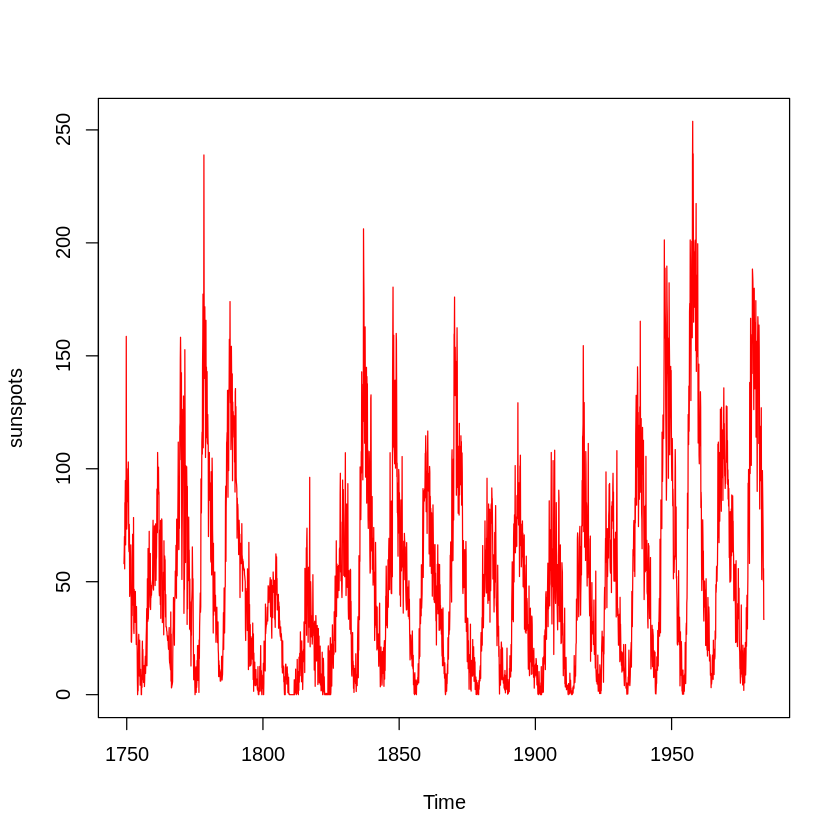

In [9]:
plot(sunspots, type='l', col='red')

In [10]:
# 뉴하벤 연간기온
?nhtemp

nhtemp {datasets},R Documentation


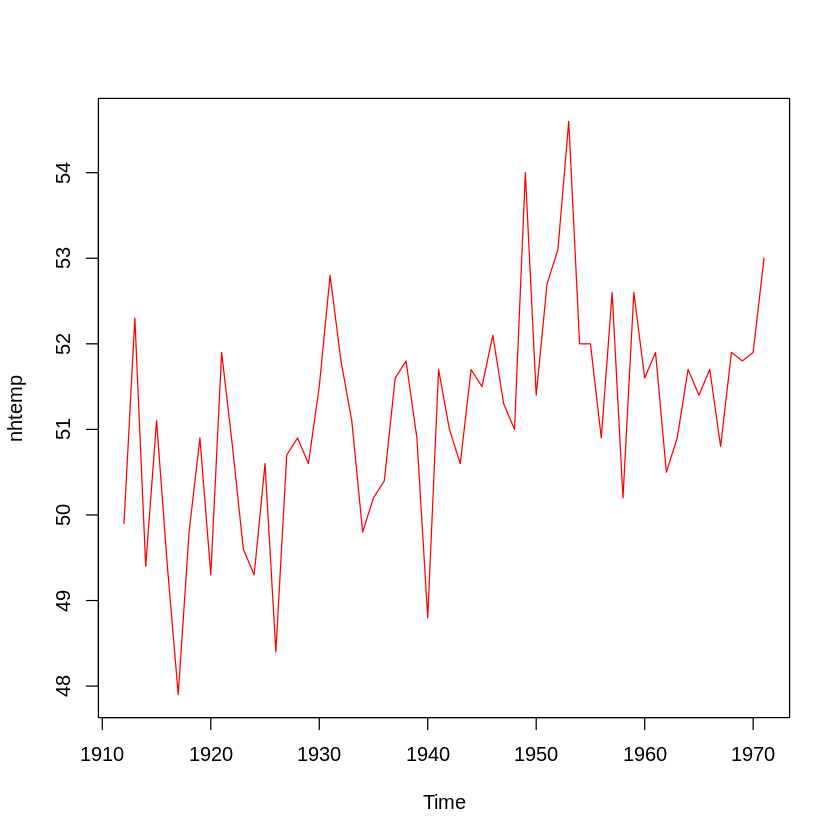

In [11]:
plot(nhtemp, type='l', col='red')